In [1]:
from scipy.cluster import hierarchy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
plt.rcParams['axes.linewidth'] = 3
plt.rc("font", family="Bookman Old Style", weight="bold")
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
def pca_and_var(X=None, n_components=10):
    principal_component_labels = [
        "PC" + str(i+1) for i in range(n_components)]
    pca_pipeline = Pipeline(
        steps=[
            ("Scaler", StandardScaler()),
            ("PCA", PCA(n_components))],
        verbose=False)
    pca_X = pca_pipeline.fit_transform(X)
    pca_X = pd.DataFrame(
        data=pca_X,
        columns=principal_component_labels)
    explained_var_ratio = pca_pipeline.get_params()[
        "PCA"].explained_variance_ratio_
    explained_var = list(
        map(lambda ratio: round(ratio * 100, 2),
            explained_var_ratio))
    explained_var = pd.Series(
        data=explained_var,
        index=principal_component_labels)
    return pca_X, explained_var

In [3]:
def scree_plot(X=None,
               n_components=None,
               title=None):
    fig, ax = plt.subplots(
        nrows=1, ncols=1,
        figsize=(12, 6), dpi=300)
    explained_variance = pca_and_var(
        X, n_components)[1]
    explained_variance.plot(
        ax=ax,
        kind="bar",
        rot=0)
    ax.set_ylabel(
        "Explained Variance (%)",
        fontsize=15, fontweight="bold")
    ax.set_xlabel(
        "Principal Components (PC)",
        fontsize=15, fontweight="bold")
    ax.set_title(
        title,
        fontsize=18, fontweight="bold", pad=20)
    fig.tight_layout()

In [4]:
def pairwise_pca_plots(X=None, y=None, title=None,
                       ylim=None, xlim=None):
    fig, axs = plt.subplots(nrows=2, ncols=3,
                            figsize=(12, 6), dpi=300)
    pairs = combinations(["PC" + str(i+1)
                          for i in range(4)], 2)
    pca_data, exp_var = pca_and_var(X, n_components=4)
    handle, labels = None, None
    for ax, pair in zip(axs.flat, pairs):
        sns.scatterplot(ax=ax,
                        data=pca_data,
                        x=pair[0],
                        y=pair[1],
                        hue=y,)
        handles, labels = ax.get_legend_handles_labels()
        ax.get_legend().remove()
        ax.set_xlabel(pair[0] + f"({exp_var[pair[0]]}%)",
                      fontsize=12, fontweight="bold")
        ax.set_ylabel(pair[1] + f"({exp_var[pair[1]]}%)",
                      fontsize=12, fontweight="bold")
        ax.set_ylim(ylim)
        ax.set_xlim(xlim)
    fig.legend(handles, labels, loc="upper center",
               bbox_to_anchor=(0.0, 0.6, 1, 0.5),
               ncol=6, fontsize=15)
    fig.tight_layout(h_pad=3)

In [6]:
data = pd.read_csv("enose_dataset\\data.csv", header=0, index_col=0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MQ-2_DG                    72 non-null     float64
 1   MQ-3_DG                    72 non-null     float64
 2   MQ-5_DG                    72 non-null     float64
 3   MQ-6_DG                    72 non-null     float64
 4   MQ-8_DG                    72 non-null     float64
 5   MQ-9_DG                    72 non-null     float64
 6   MQ-135_DG                  72 non-null     float64
 7   MQ-138_DG                  72 non-null     float64
 8   MQ-2_PK                    72 non-null     float64
 9   MQ-3_PK                    72 non-null     float64
 10  MQ-5_PK                    72 non-null     float64
 11  MQ-6_PK                    72 non-null     float64
 12  MQ-8_PK                    72 non-null     float64
 13  MQ-9_PK                    72 non-null     float64
 

In [8]:
X_MOS = data.iloc[:, 0:56]
X_CSA = data.iloc[:, 56:80]
X_FUSION = data.iloc[:, :80]
y = data["VOC"]

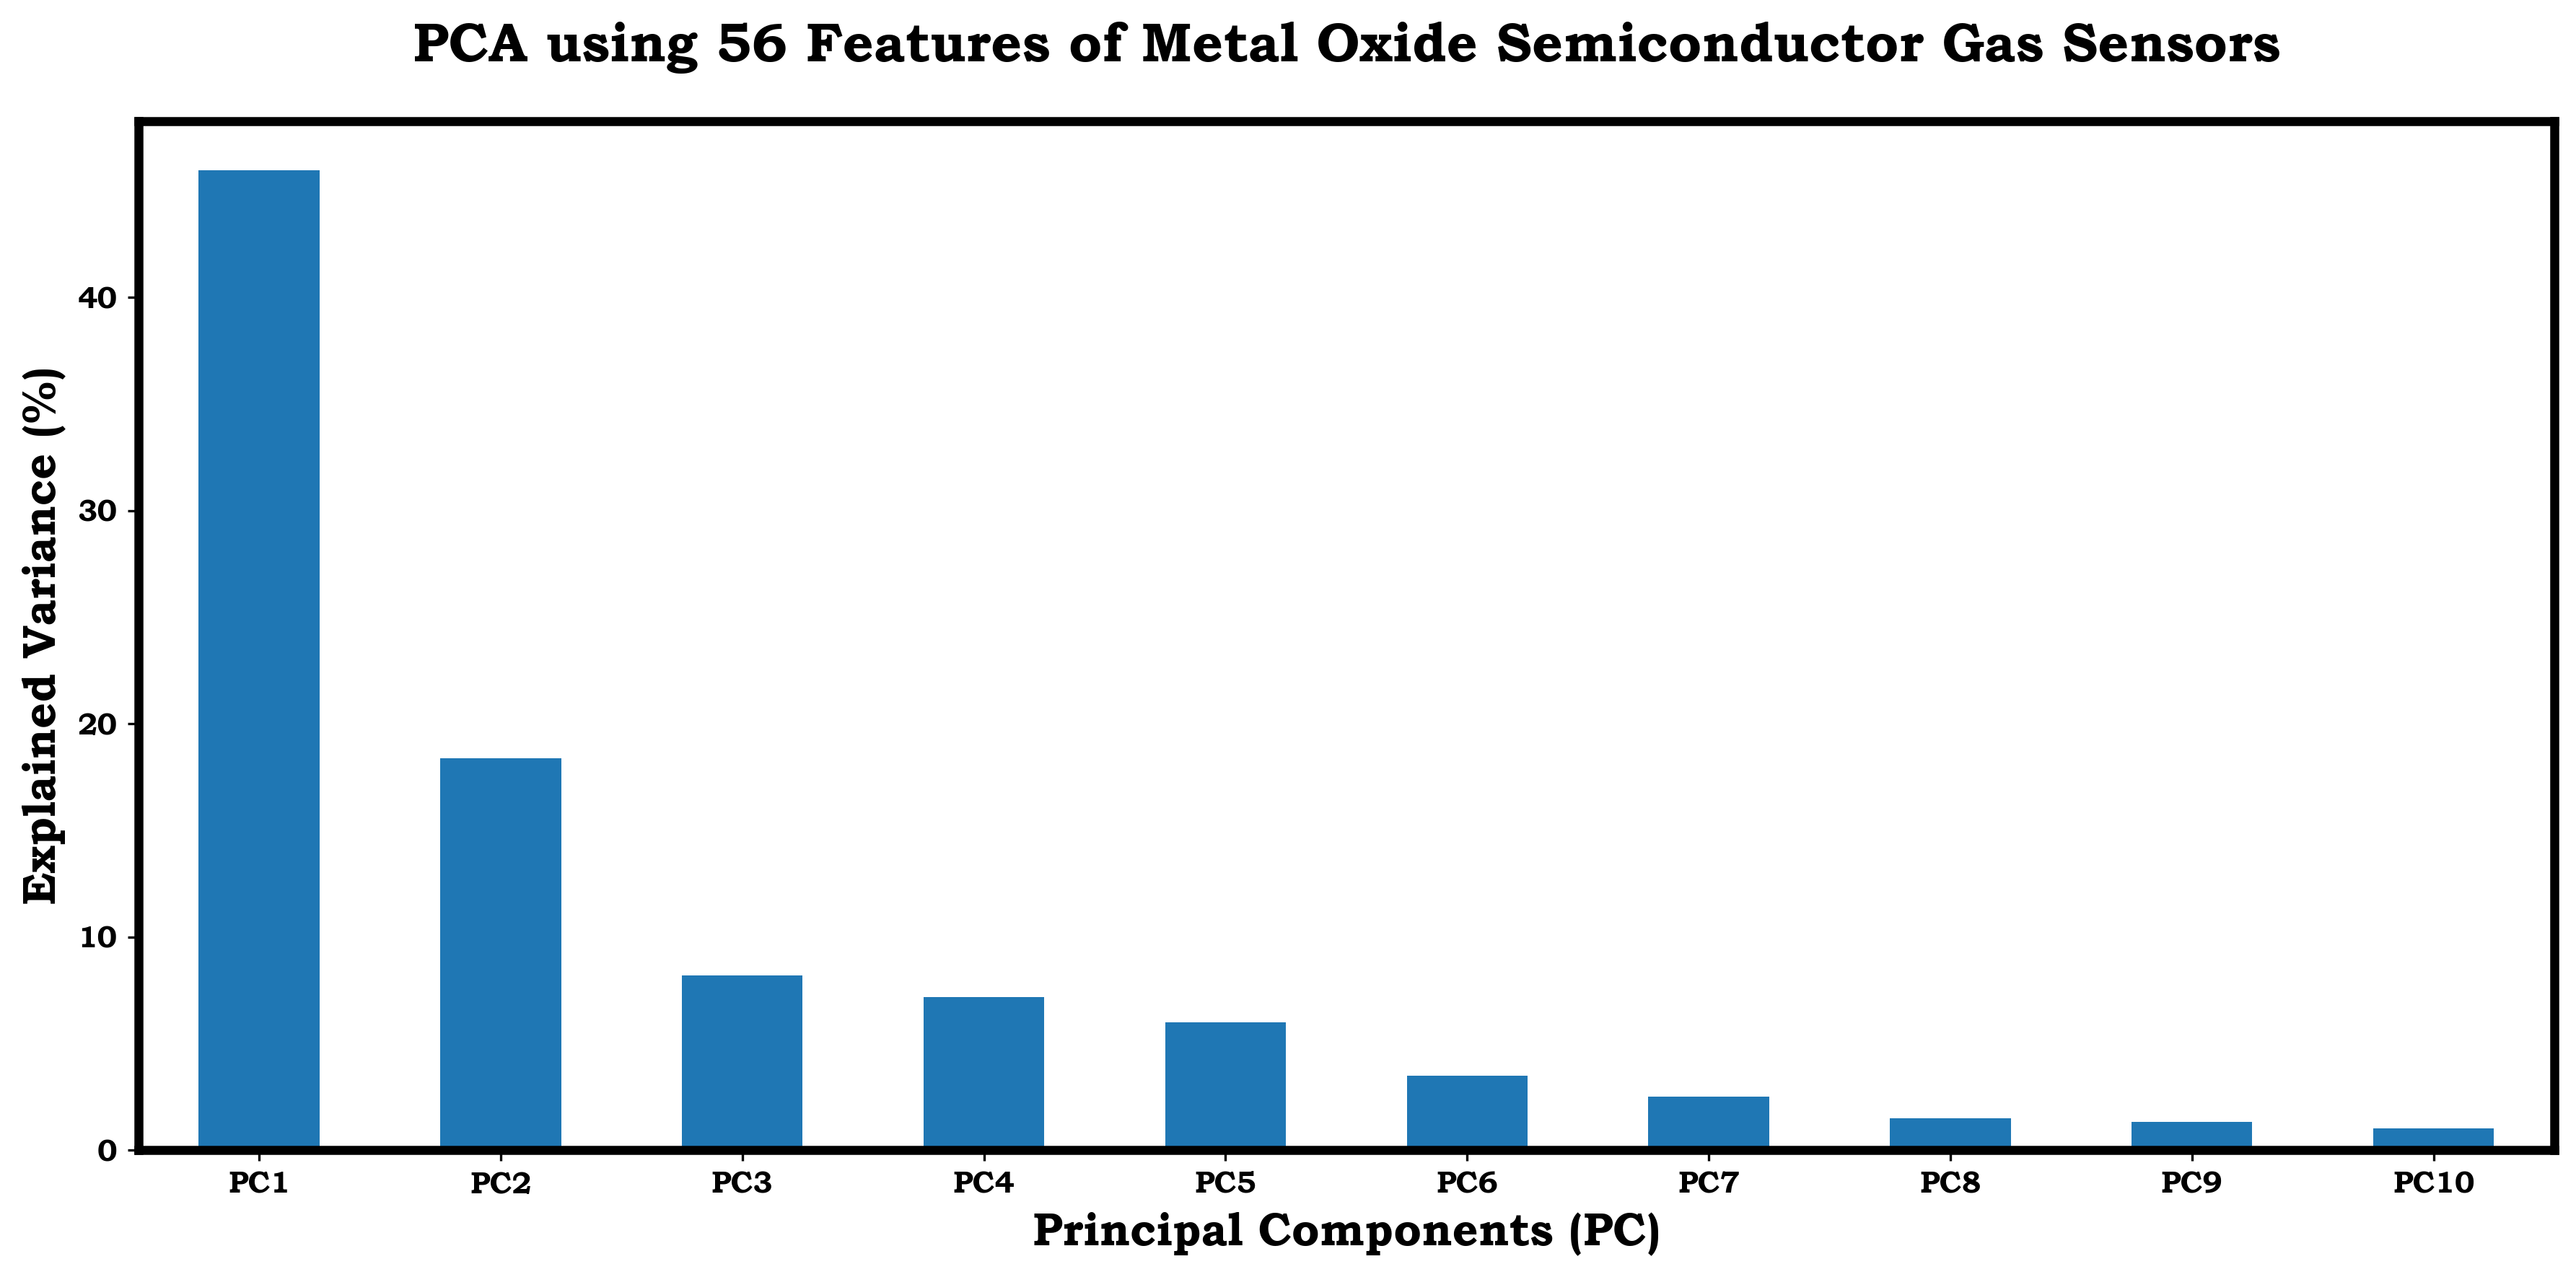

In [9]:
scree_plot(
    X_MOS, 10,
    "PCA using 56 Features of Metal Oxide Semiconductor Gas Sensors")

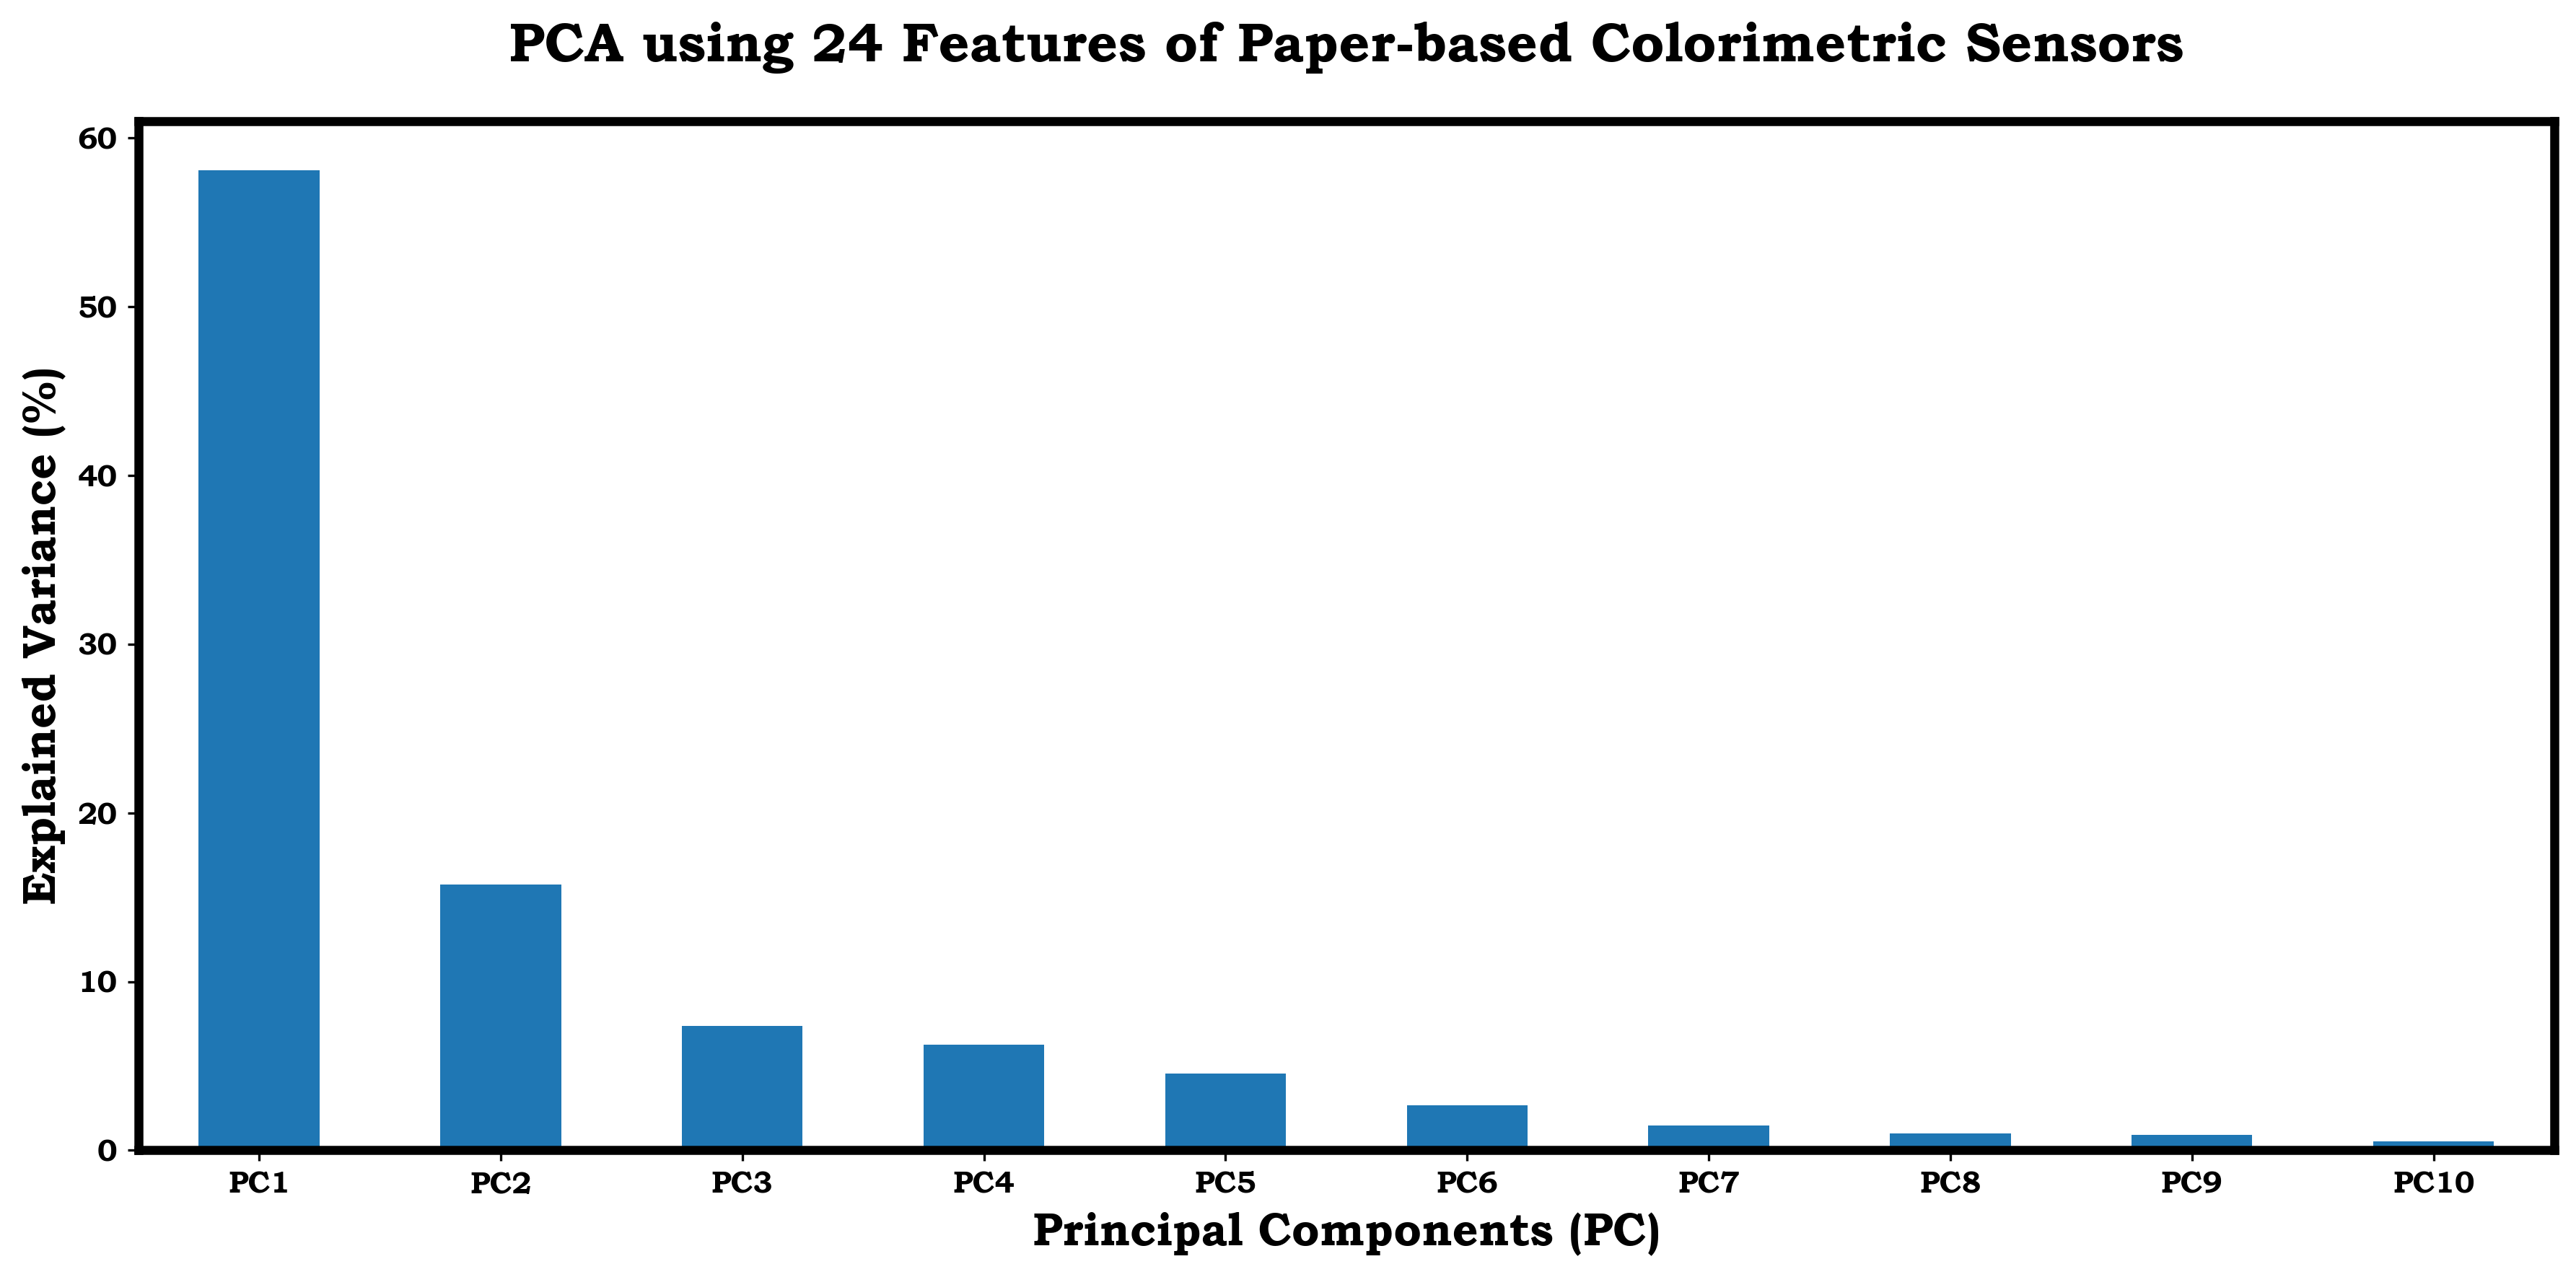

In [10]:
scree_plot(
    X_CSA,
    10,
    "PCA using 24 Features of Paper-based Colorimetric Sensors")

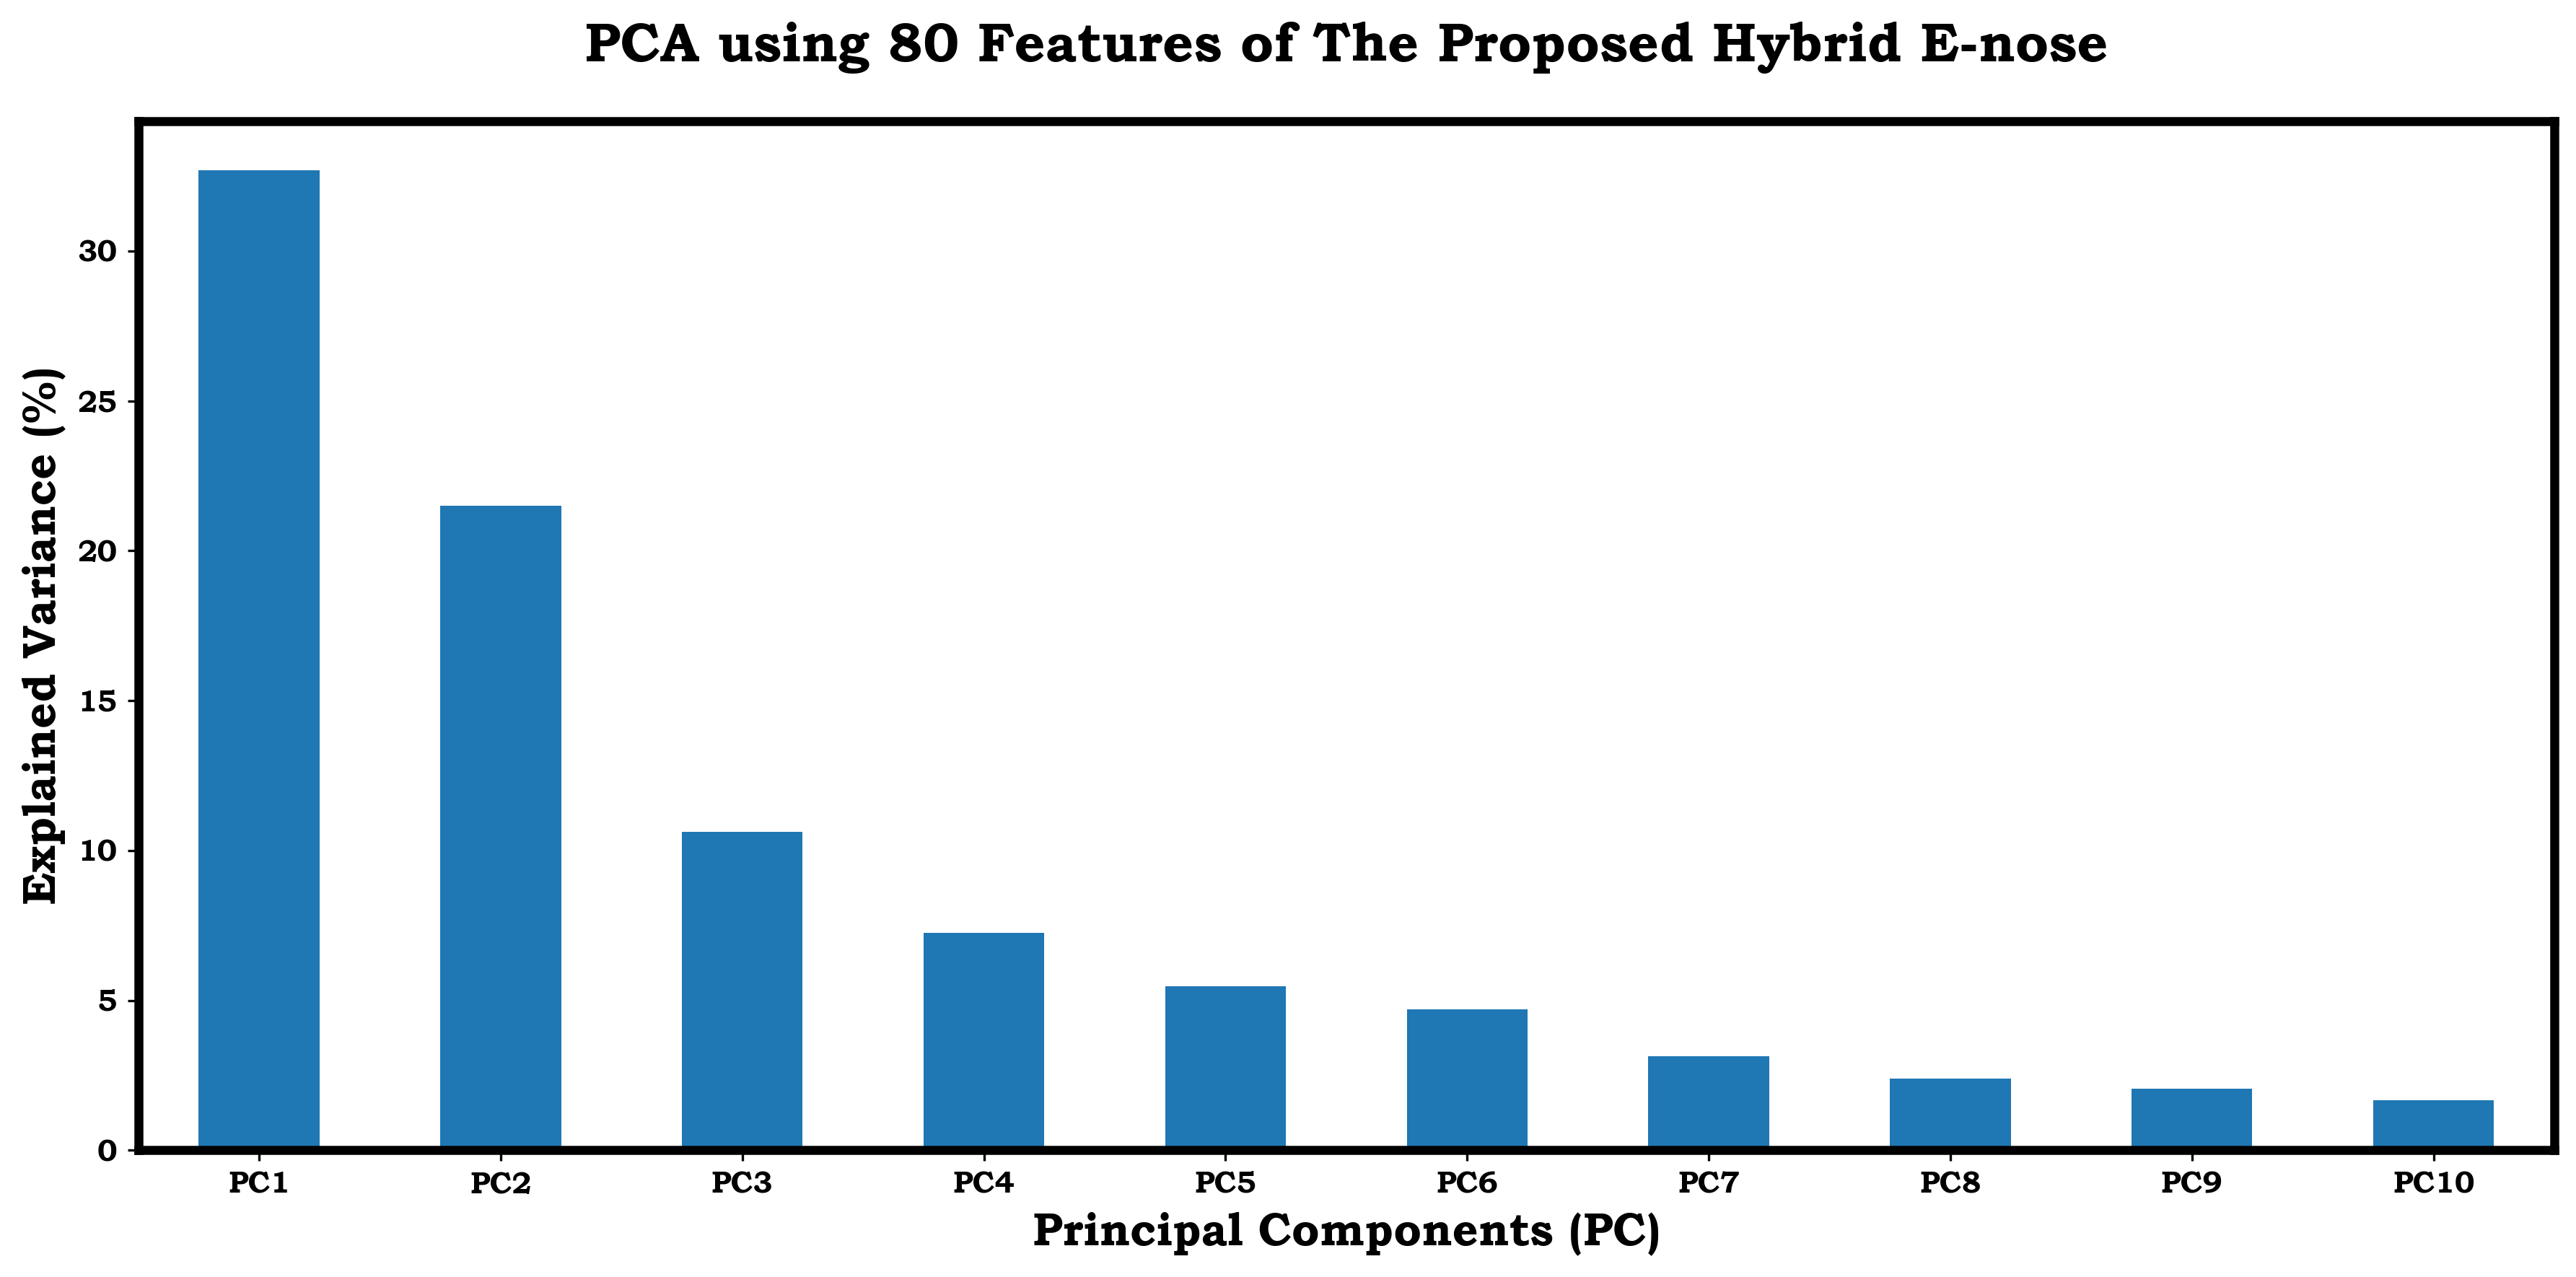

In [11]:
scree_plot(
    X_FUSION,
    10,
    "PCA using 80 Features of The Proposed Hybrid E-nose")

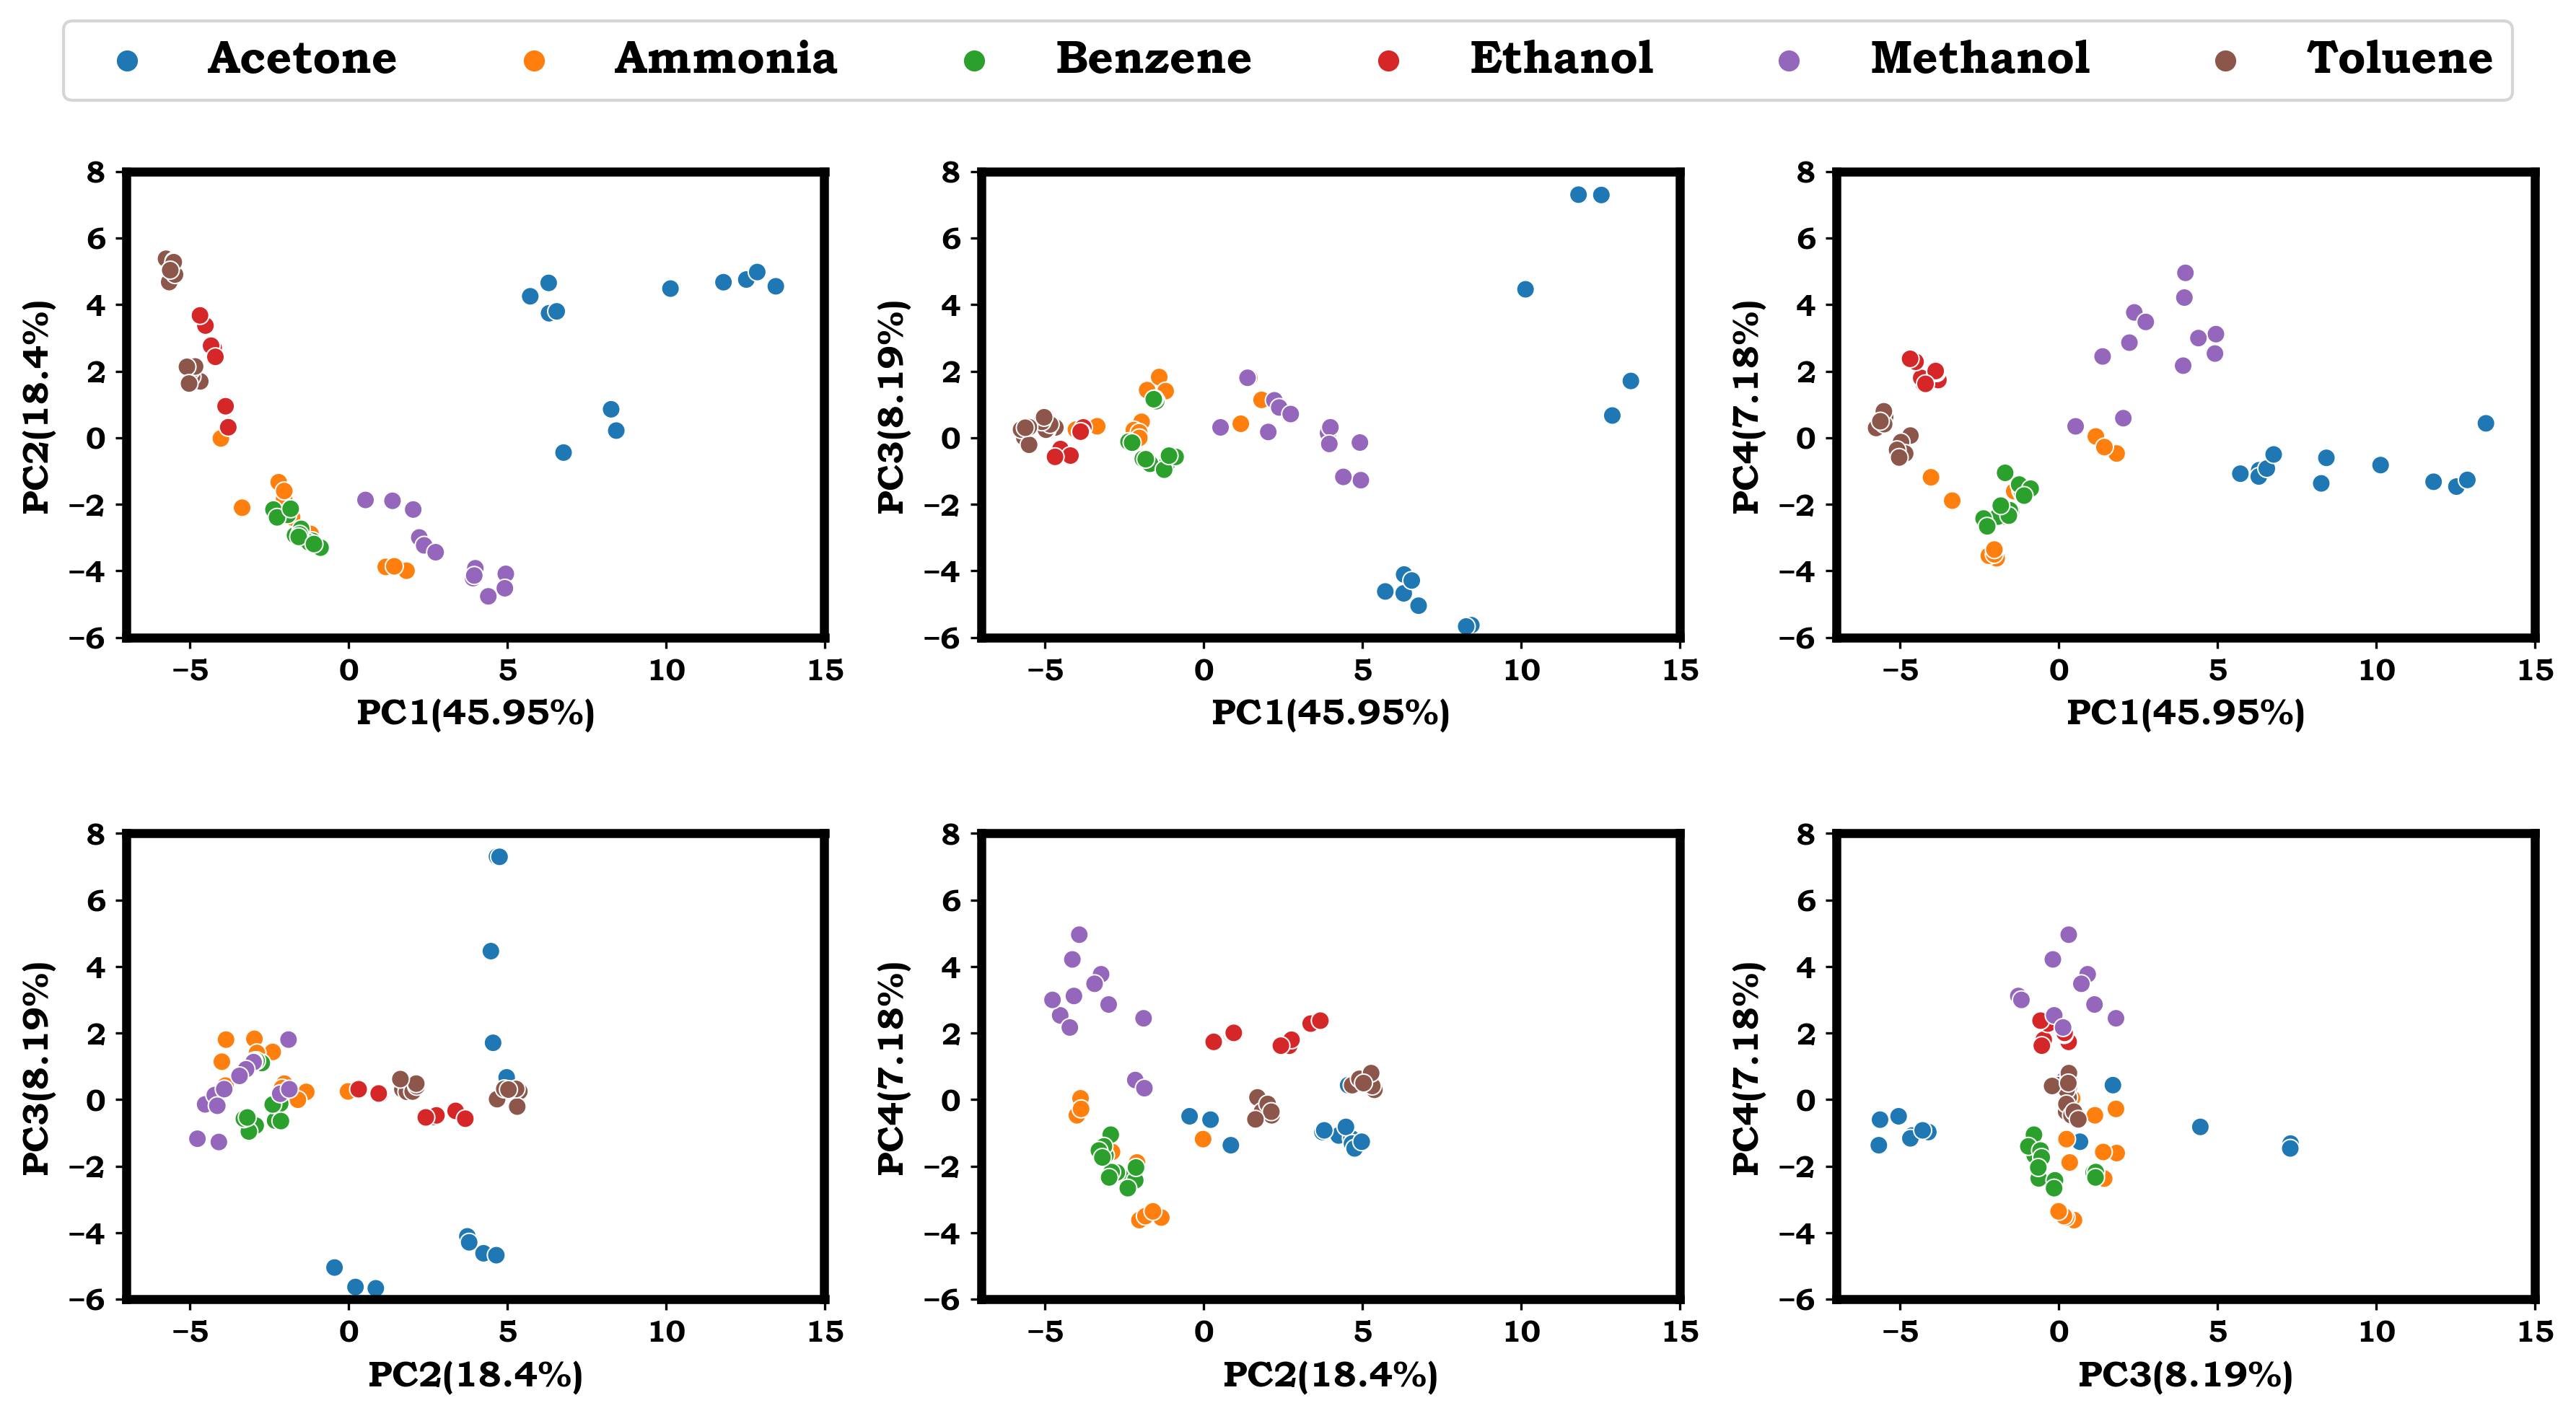

In [12]:
pairwise_pca_plots(
    X=X_MOS,
    y=y,
    ylim=[-6, 8],
    xlim=[-7, 15])


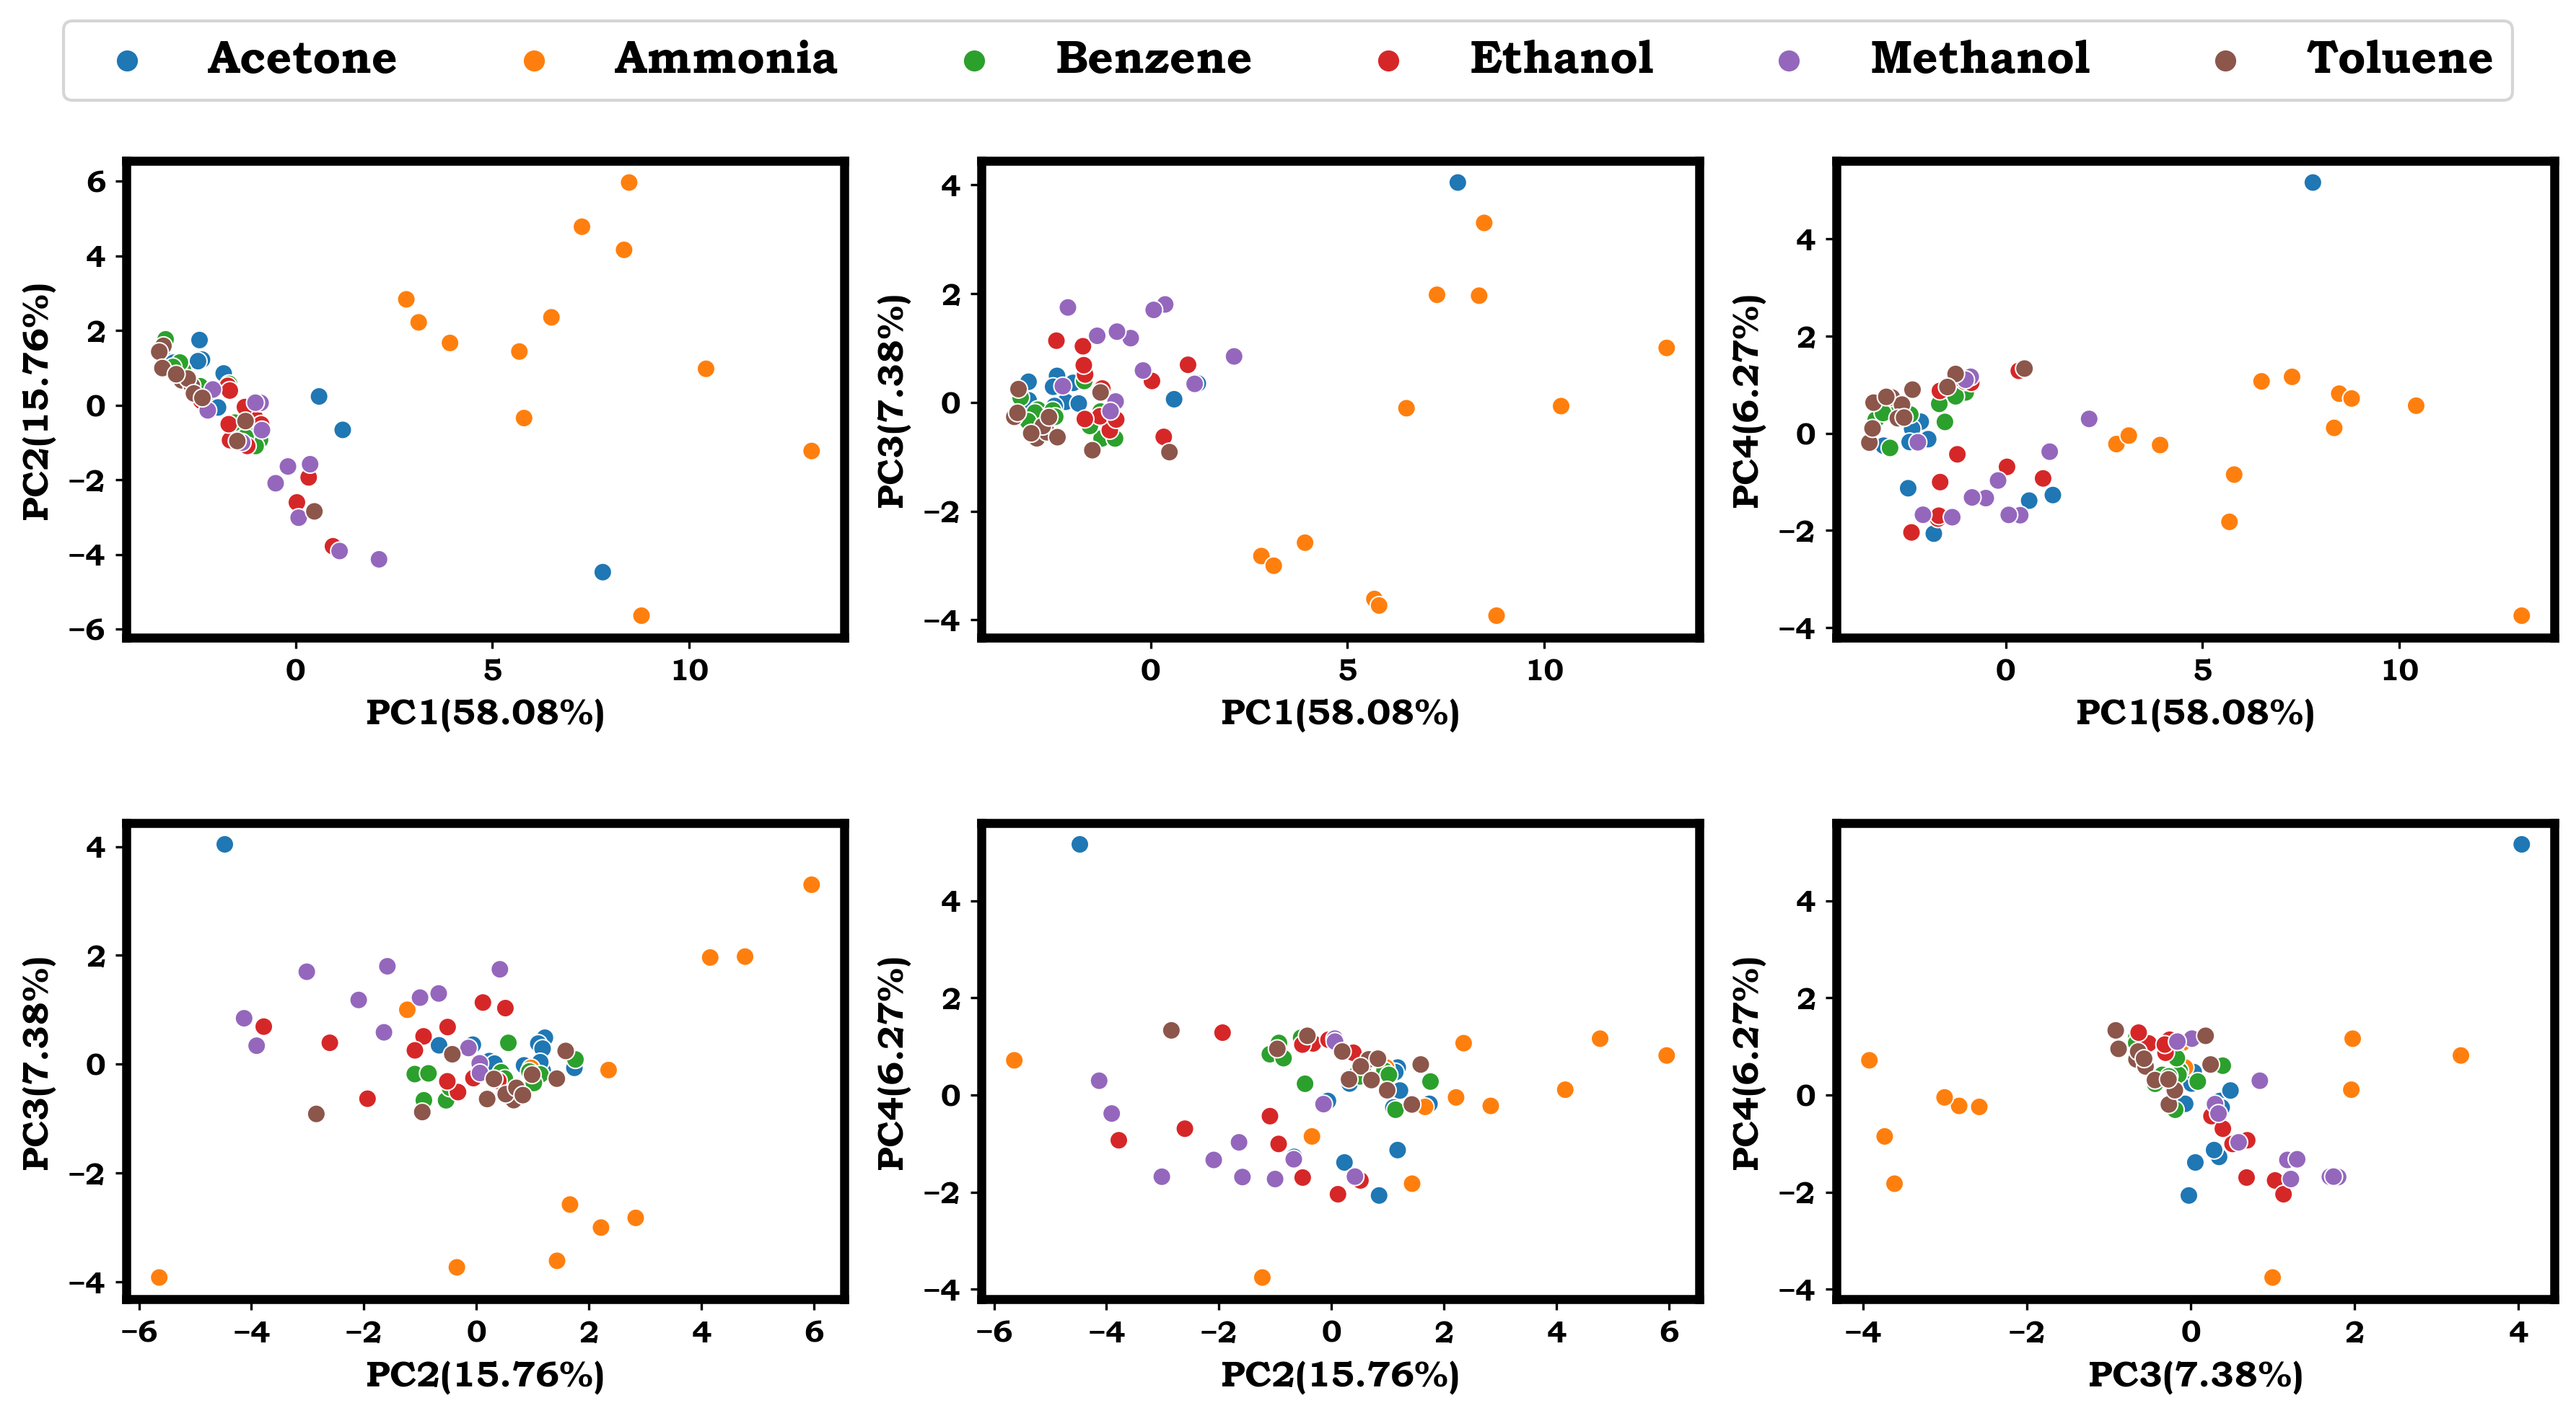

In [13]:
pairwise_pca_plots(
    X=X_CSA, y=y)

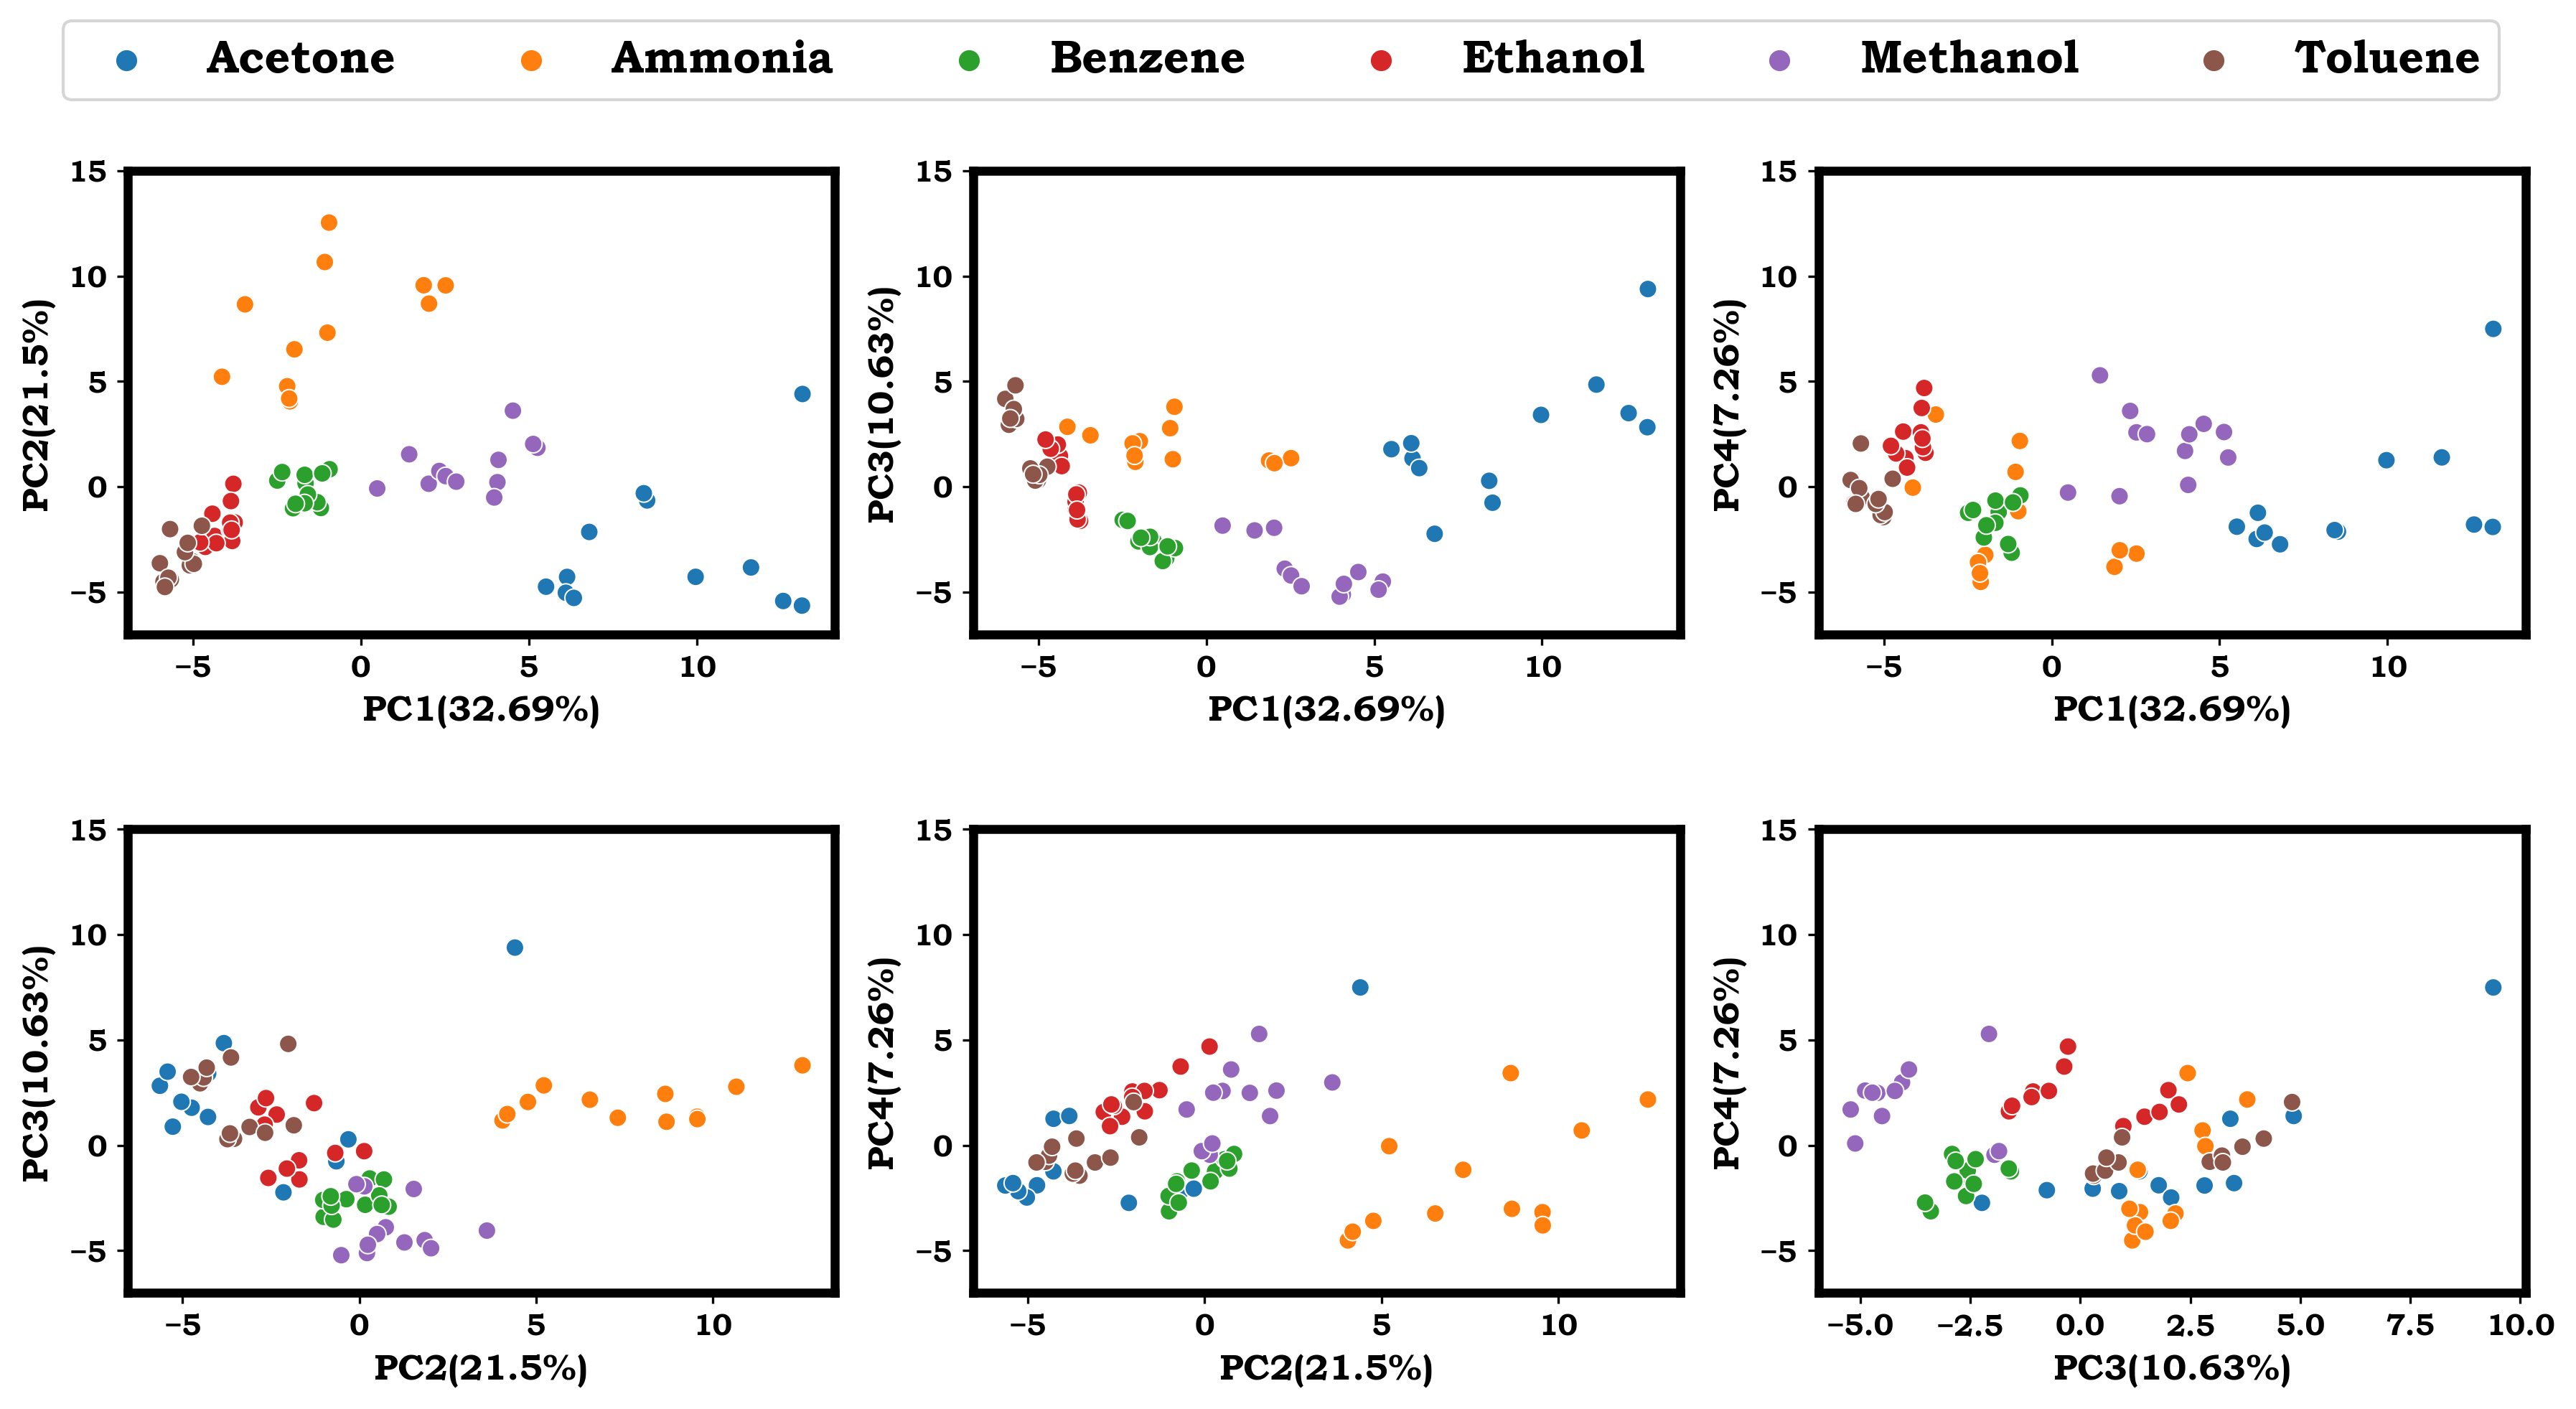

In [14]:
pairwise_pca_plots(
    X_FUSION,
    y=y,
    ylim=[-7, 15])


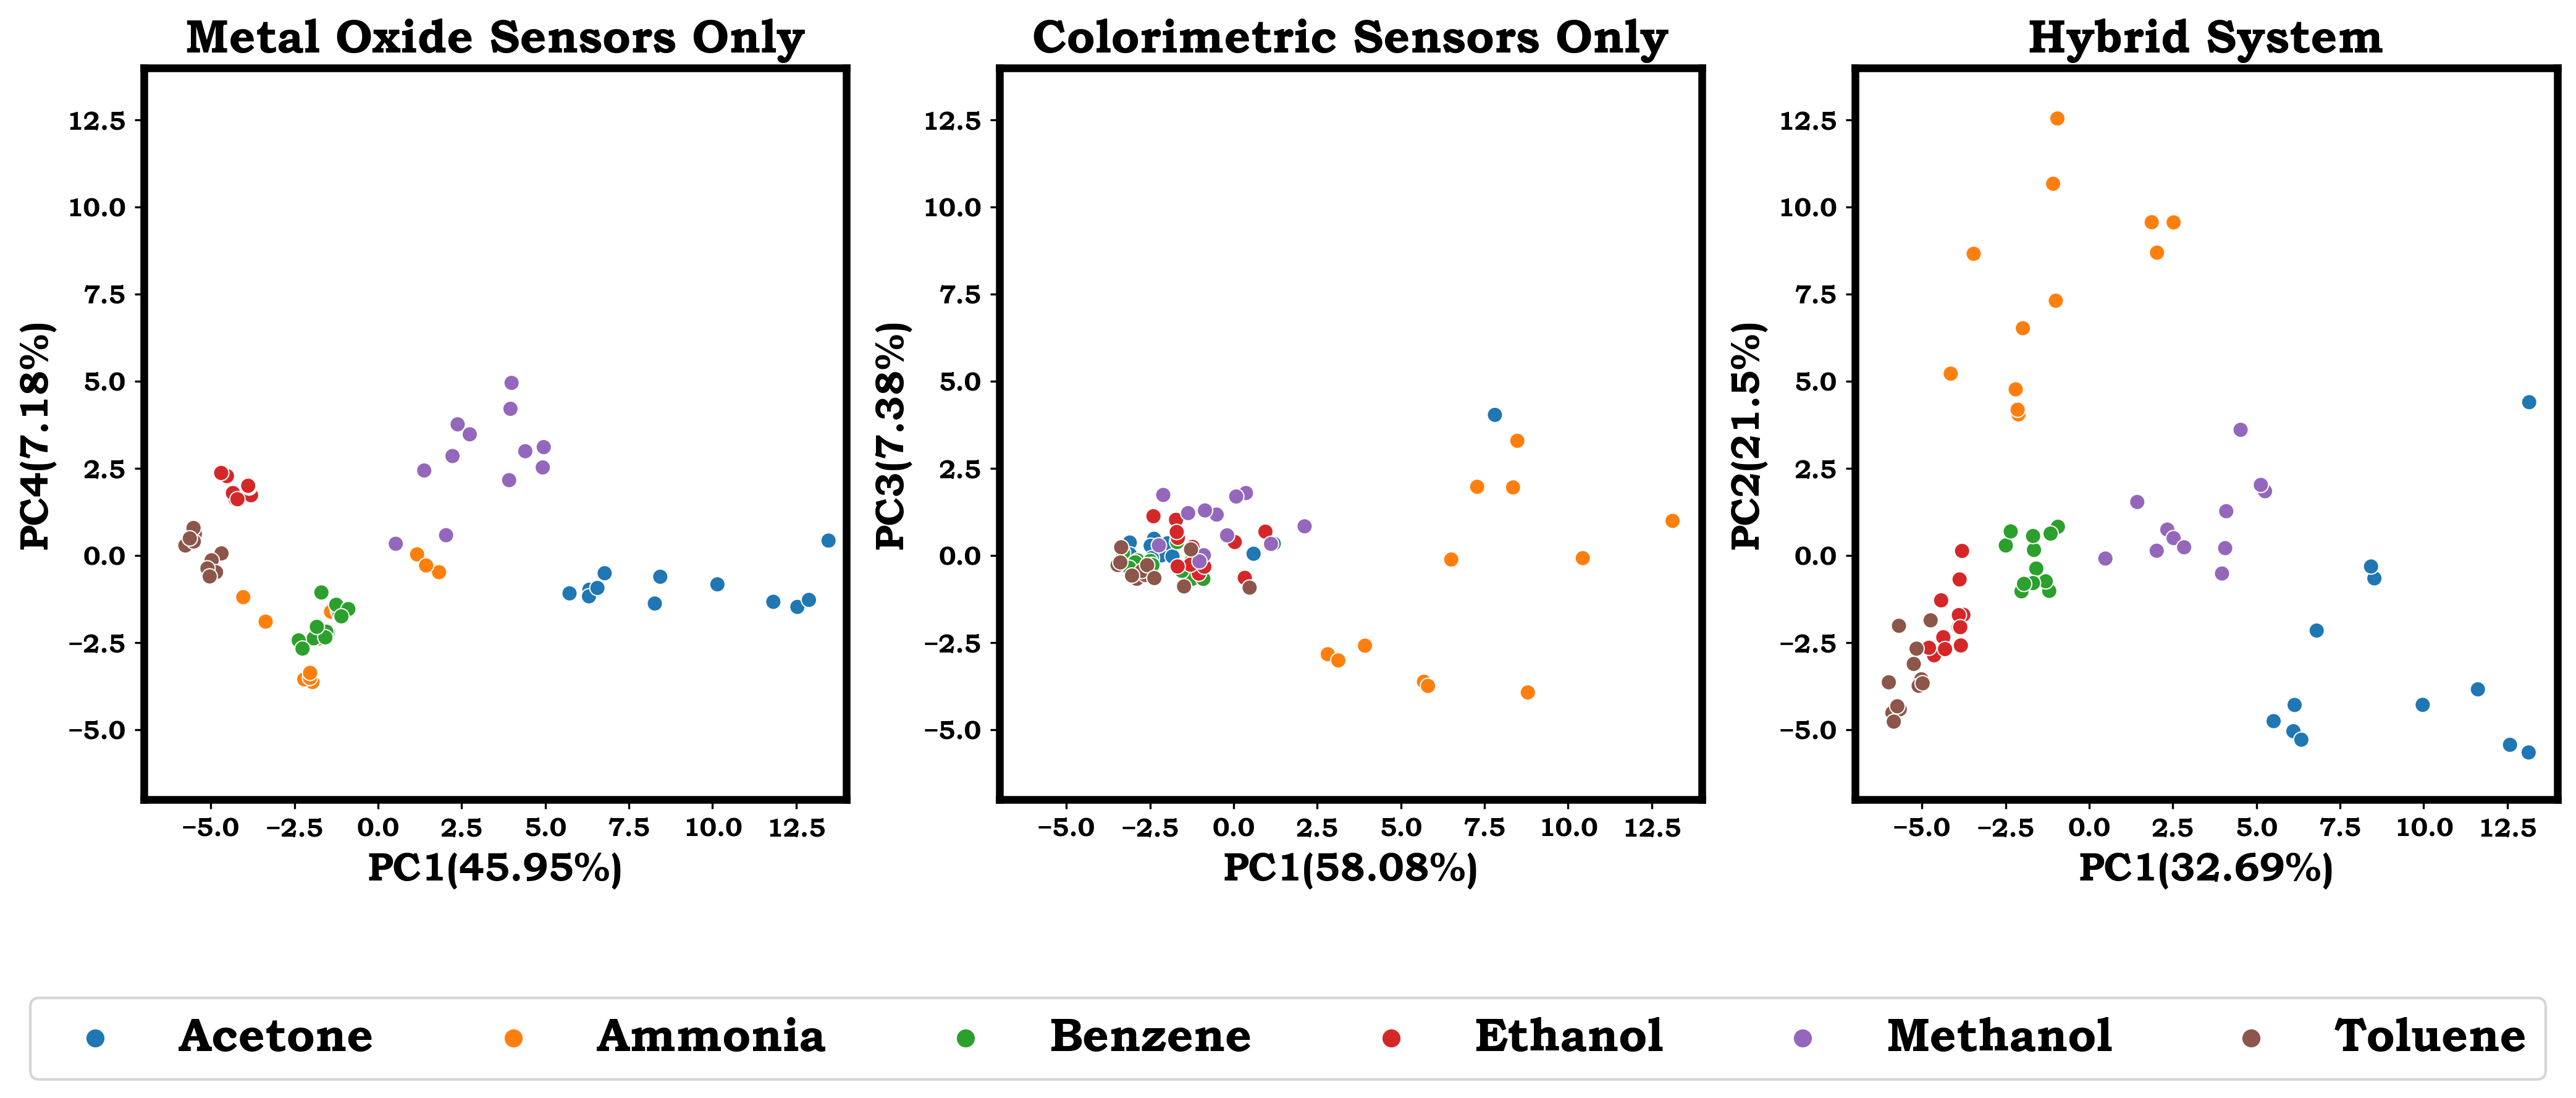

In [15]:
hybrid_pca, hybrid_exp = pca_and_var(X_FUSION,
                                     n_components=10)
MOS_pca, MOS_exp = pca_and_var(
    X_MOS, n_components=10)
CSA_pca, CSA_exp = pca_and_var(
    X_CSA, n_components=10)

figure, axs = plt.subplots(nrows=1, ncols=3,
                           figsize=(14, 5), dpi=300)
for ax, pair, pca, exp, title in zip(
    axs.flat,
    [("PC1", "PC4"),
     ("PC1", "PC3"),
     ("PC1", "PC2")],
    [MOS_pca,
     CSA_pca,
     hybrid_pca],
    [MOS_exp,
     CSA_exp,
     hybrid_exp],
    ["Metal Oxide Sensors Only",
     "Colorimetric Sensors Only",
     "Hybrid System"]):
    sns.scatterplot(ax=ax,
                    data=pca,
                    x=pair[0],
                    y=pair[1],
                    hue=y)
    ax.set_xlabel(pair[0] + f"({exp[pair[0]]}%)",
                  fontsize=15, fontweight="bold")
    ax.set_ylabel(pair[1] + f"({exp[pair[1]]}%)",
                  fontsize=15, fontweight="bold")
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    ax.set_xlim([-7, 14])
    ax.set_ylim([-7, 14])
    ax.set_title(title, fontsize=18, fontweight="bold")
figure.legend(handles, labels, loc="lower center",
              bbox_to_anchor=(0.0, -0.2, 1, 0.5),
              ncol=6, fontsize=18)
figure.tight_layout(h_pad=3)

In [16]:
def hca_plot(X=None, y=None, features=None,
             threshold=None, linkage_method="single",
             title=None):
    fig = plt.figure(figsize=(12, 6), dpi=300)
    ax = fig.add_subplot(111)
    X.index = y
    Z = hierarchy.linkage(X[features],
                          linkage_method)
    dn = hierarchy.dendrogram(
        Z,
        ax=ax,
        distance_sort="ascending",
        labels=X.index,
        color_threshold=threshold,
        orientation="top",
        leaf_font_size=8)
    xmin, xmax = ax.get_xlim()
    ax.set_ylabel(
        "Linkage distance or euclidean distance between clusters",
        fontdict={"size": 12,
                  "weight": "bold"})
    ax.set_title(
        title,
        fontdict={"size": 18,
                  "weight": "bold"})
    fig.tight_layout()

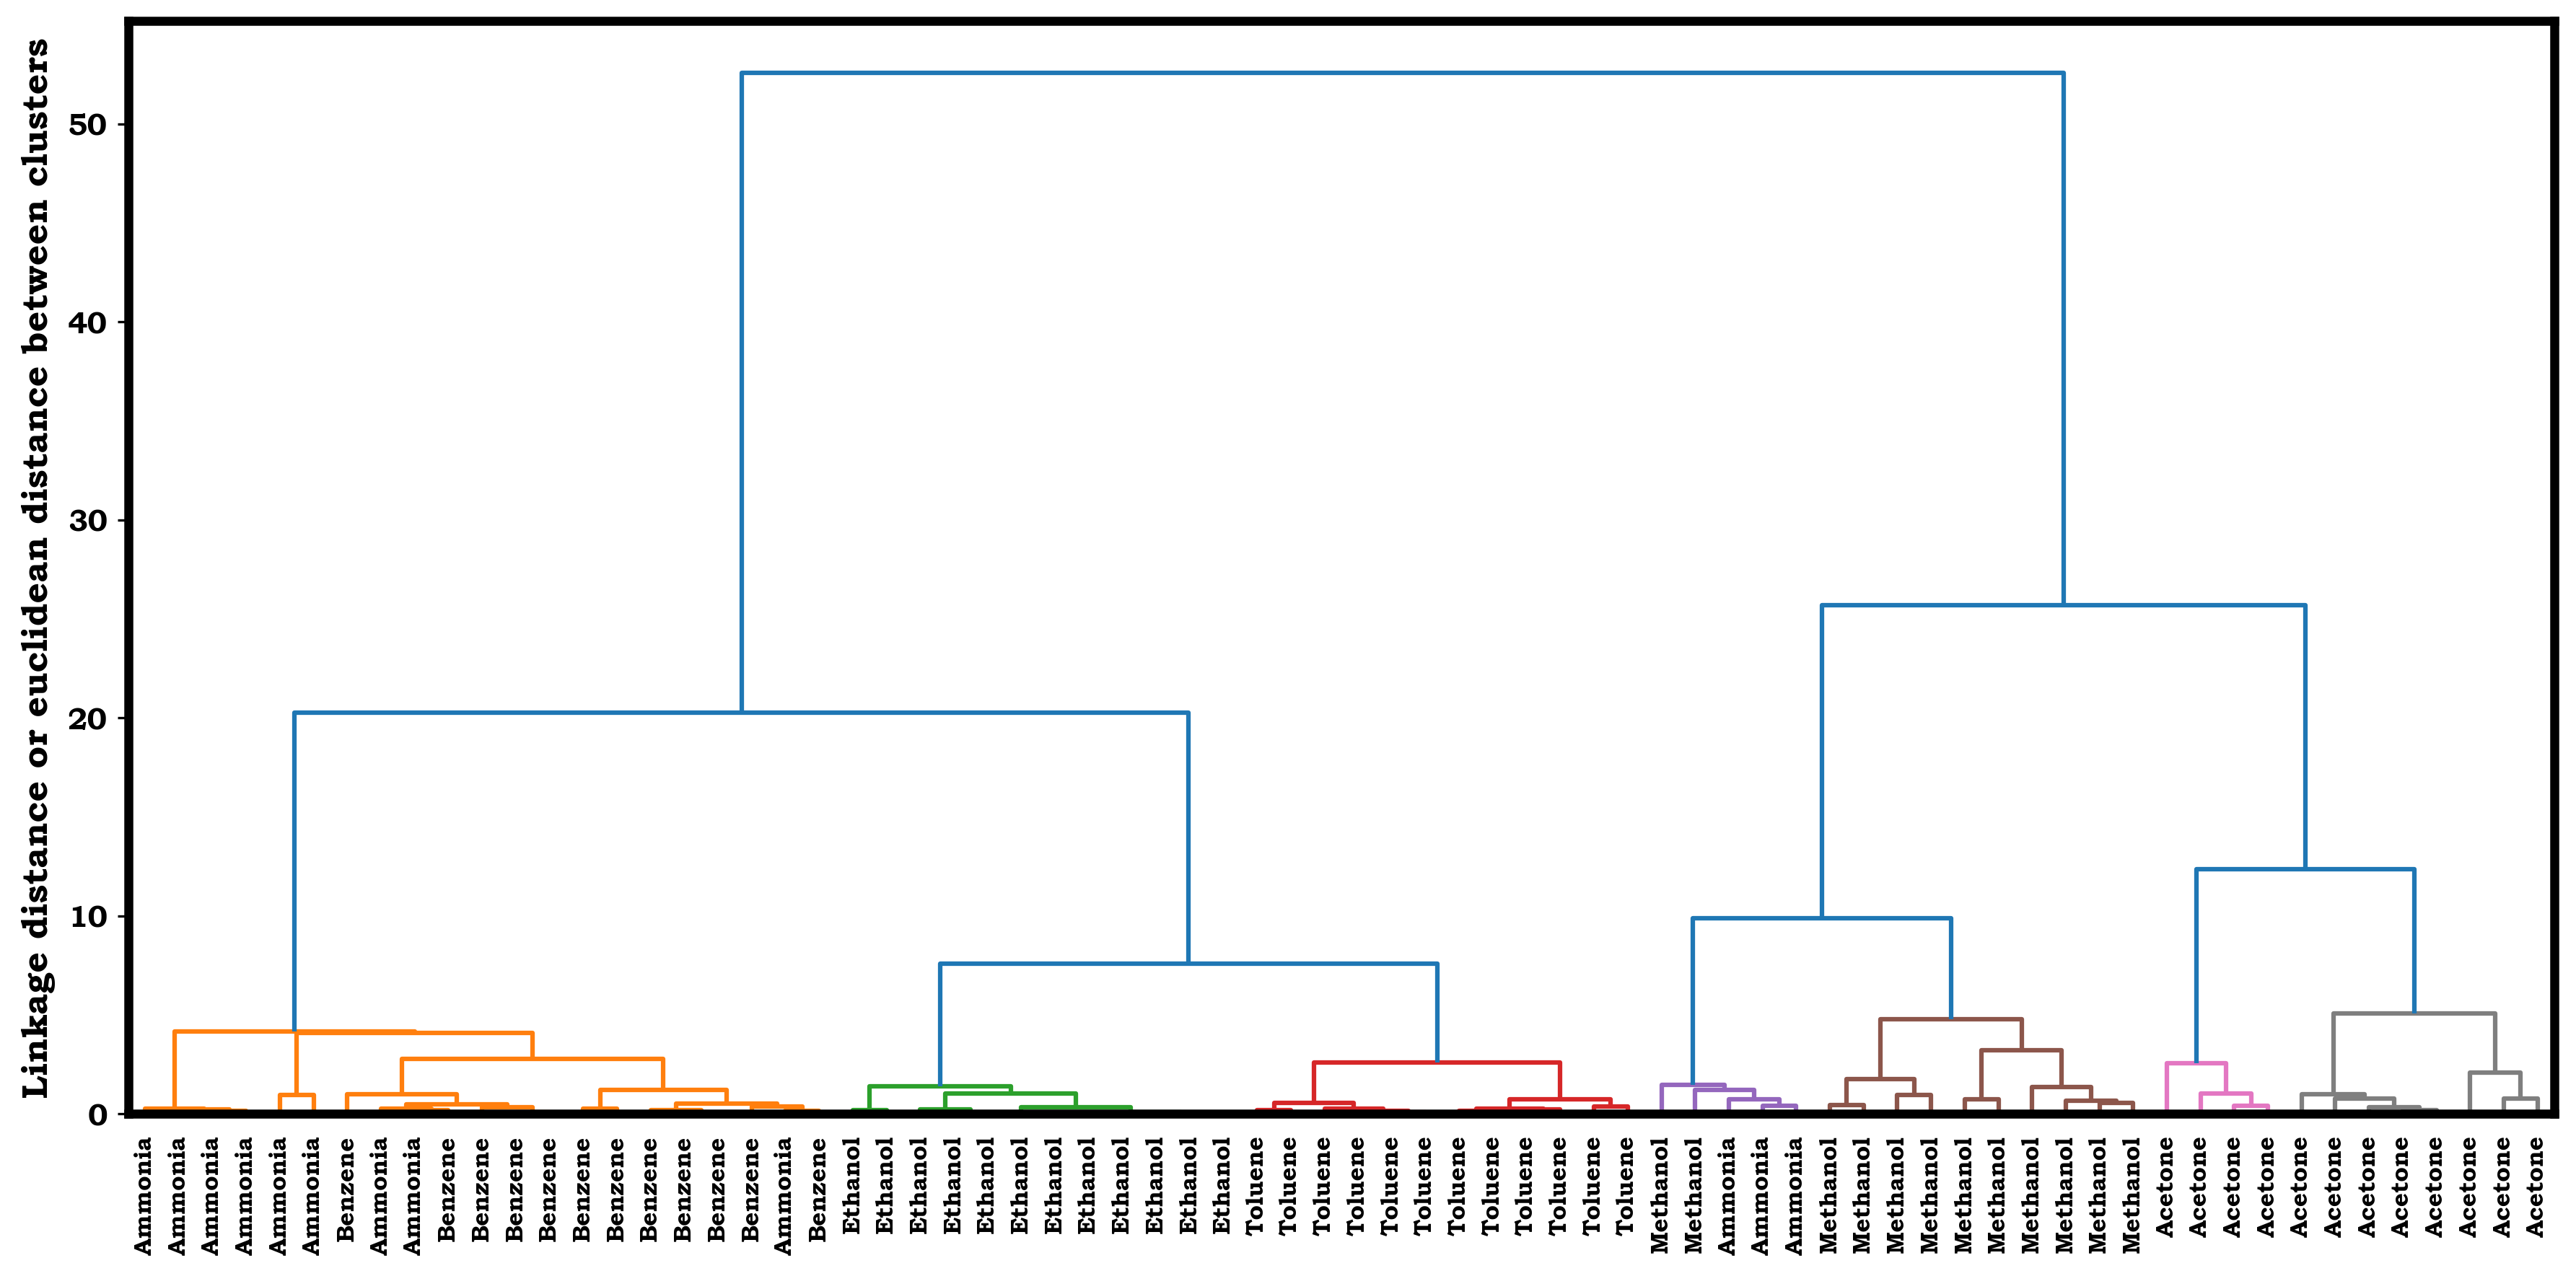

In [17]:
hca_plot(X=MOS_pca, y=y,
         threshold=6, features=["PC1", "PC4"],
         linkage_method="ward", title=None)


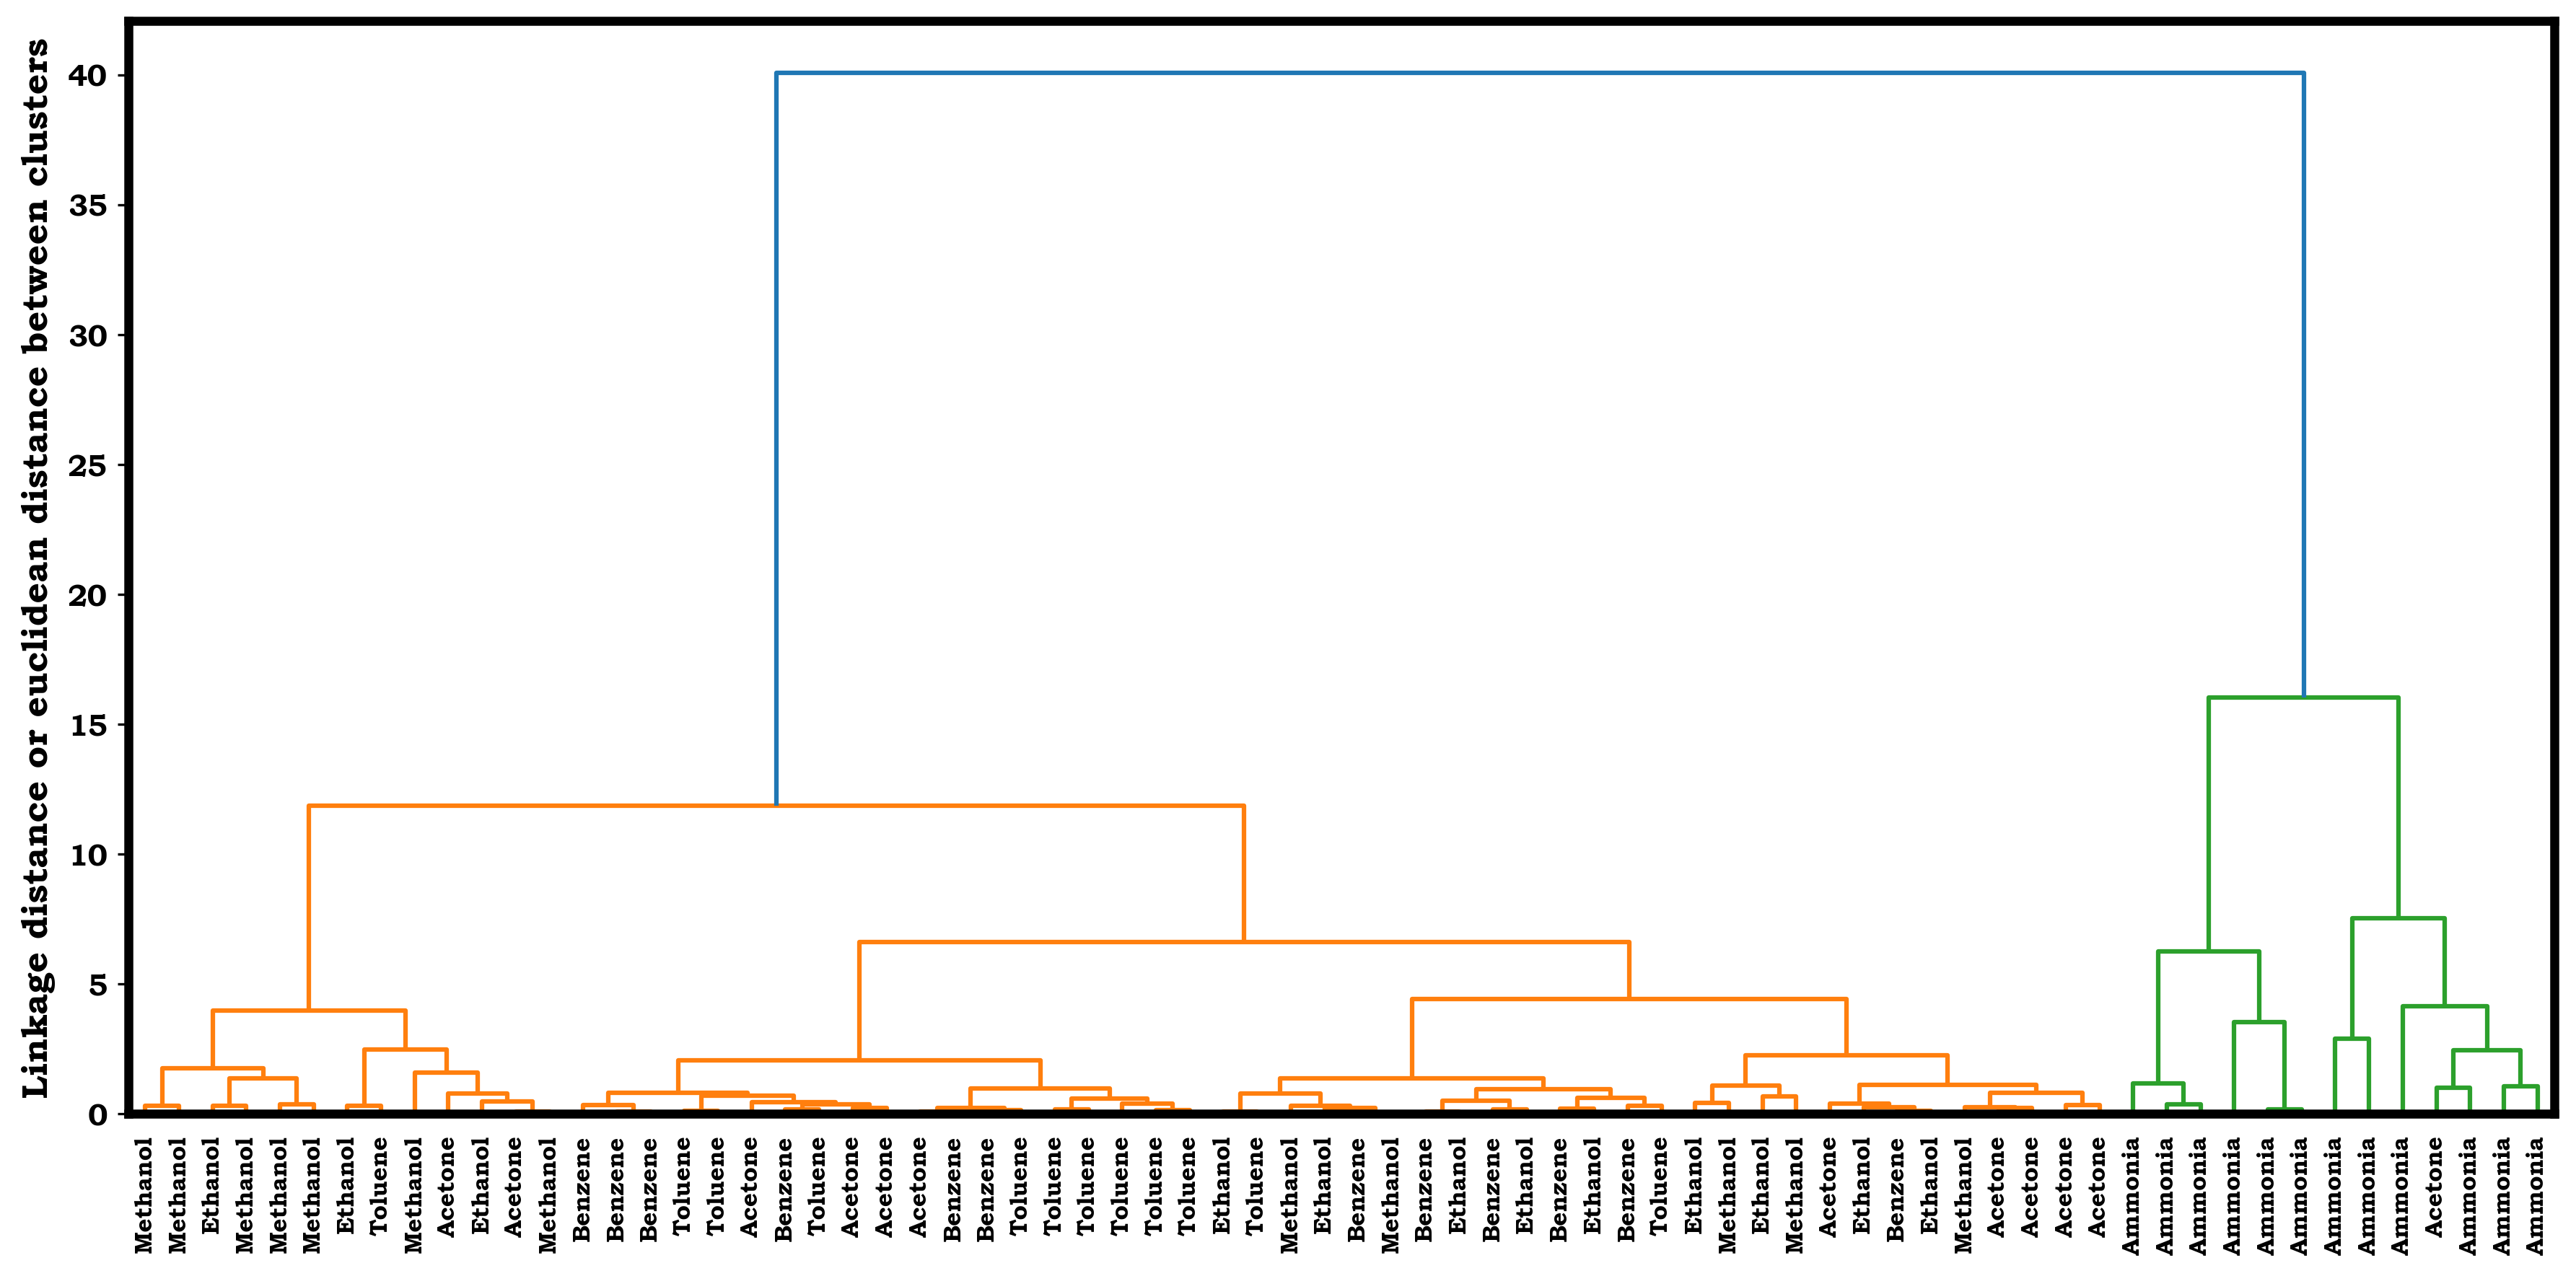

In [18]:
hca_plot(X=CSA_pca, y=y, threshold=20,
         features=["PC1", "PC3"],
         linkage_method="ward", title=None)

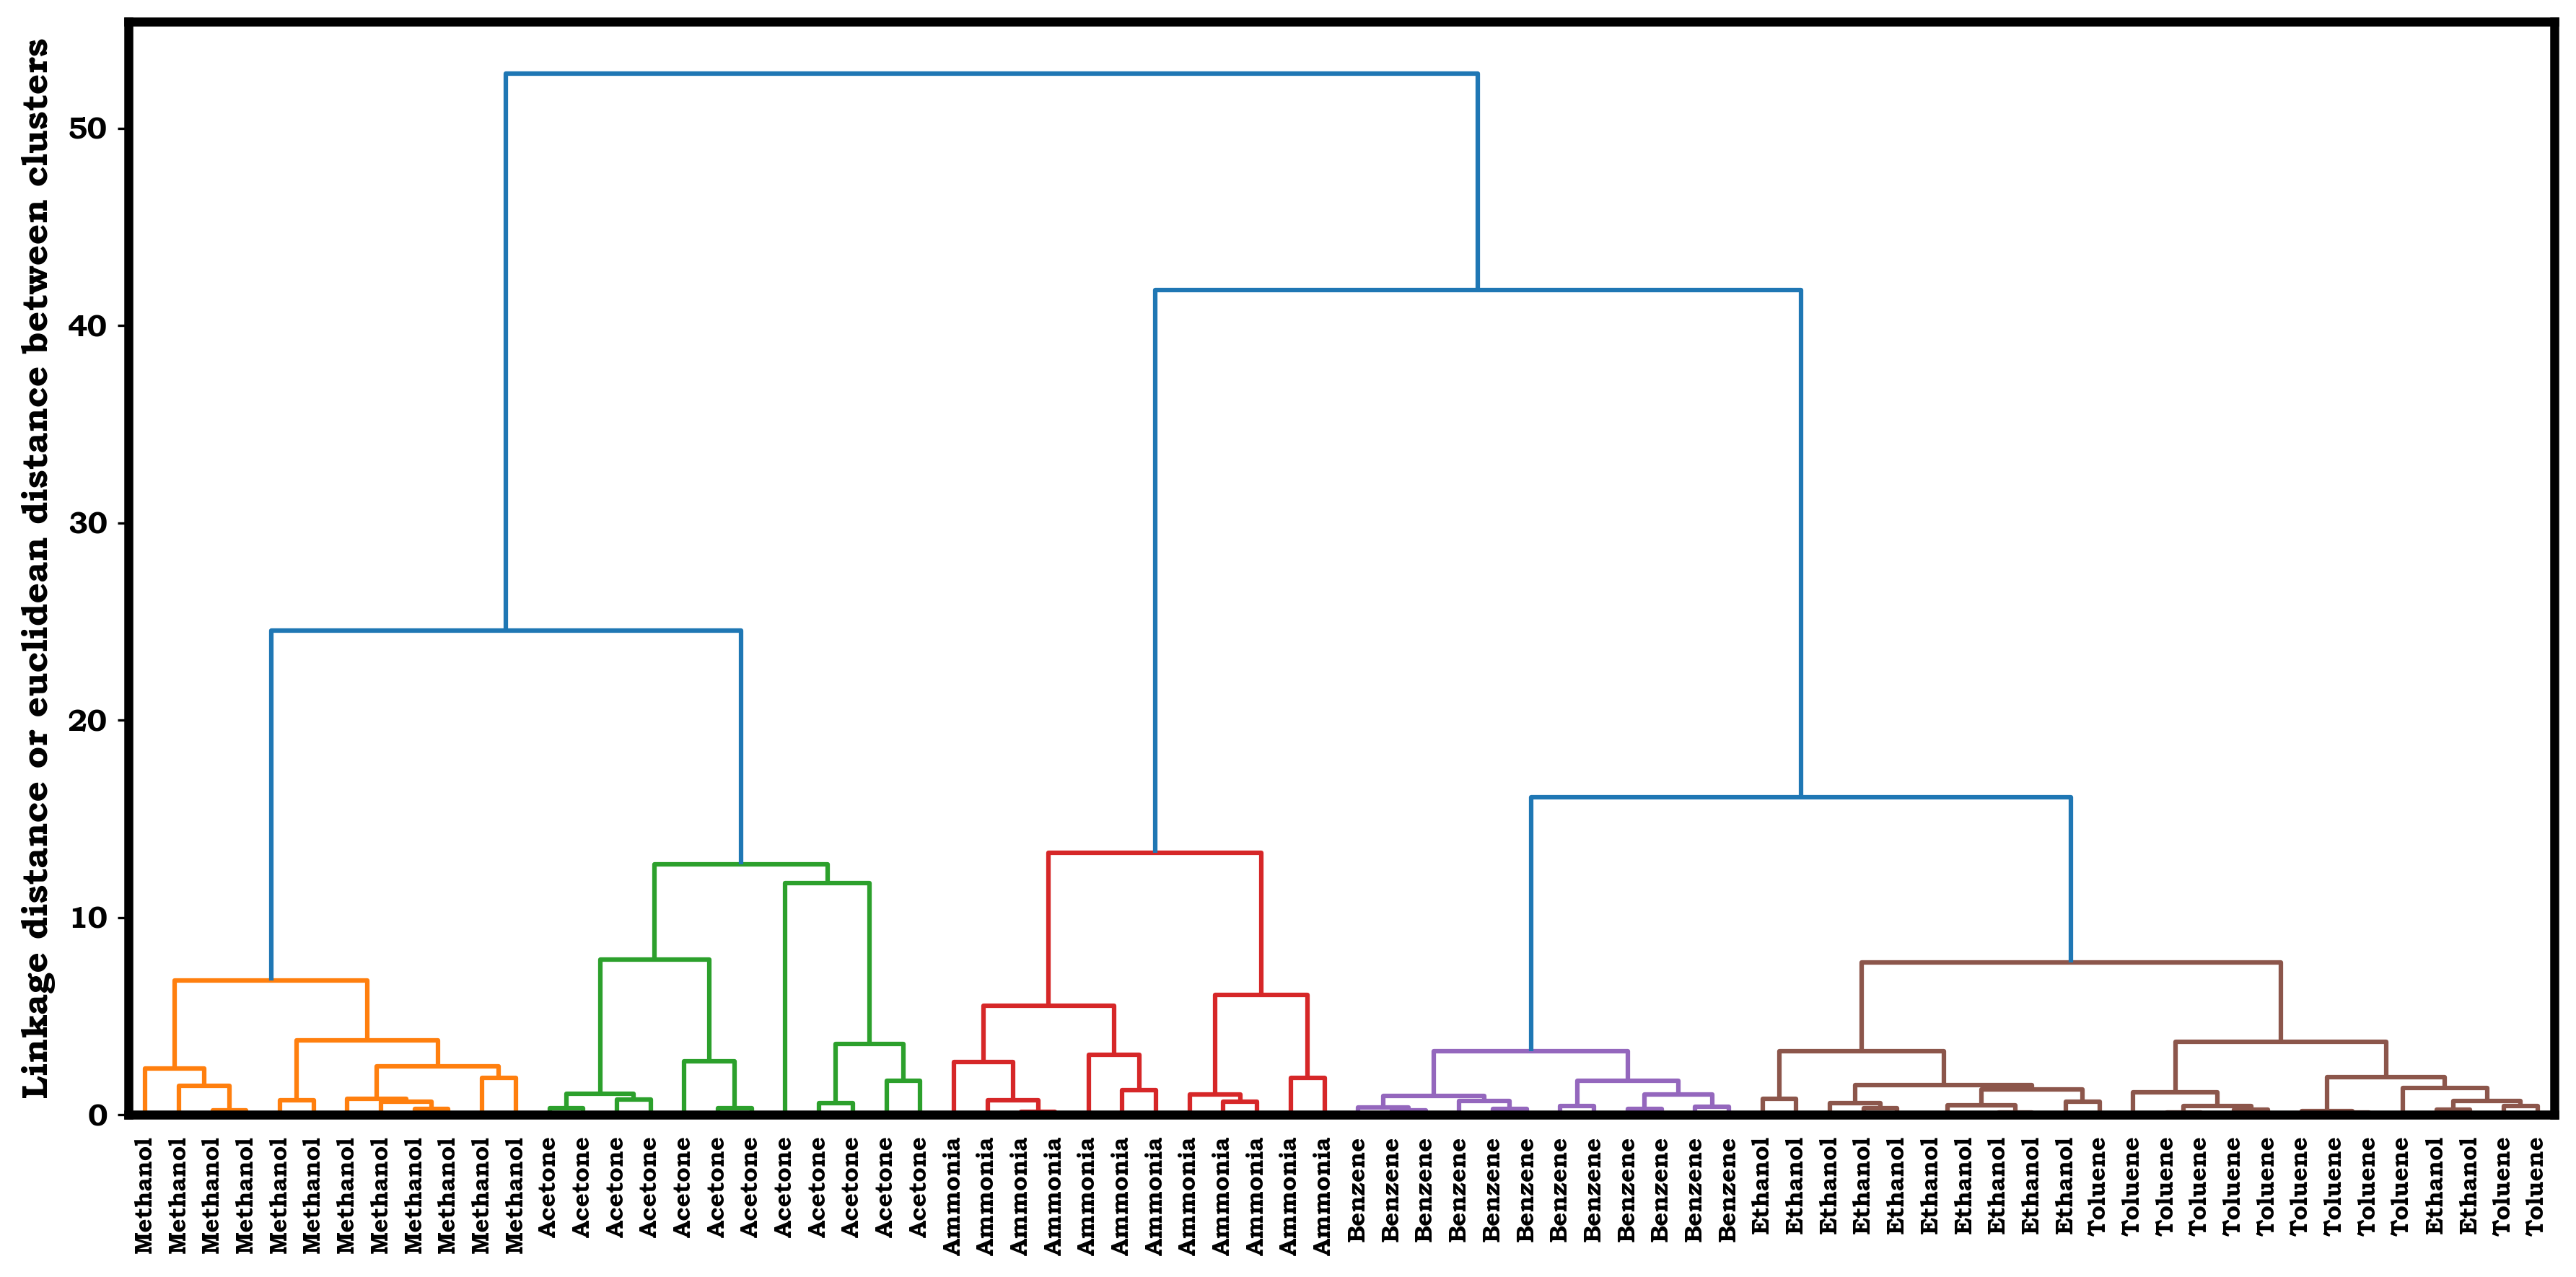

In [19]:
hca_plot(X=hybrid_pca, y=y, threshold=15,
         features=["PC1", "PC2"],
         linkage_method="ward", title=None)